# Gold Reserves Analysis Plan

## Major Assumptions
This analysis assumes access to historical gold reserves data by country spanning 2002-2022, with consistent reporting standards across countries and years. The analysis will focus on identifying trends in gold accumulation/depletion rates, comparing major gold-holding nations, and visualizing changes in global gold reserve distribution over the 20-year period. We assume data quality is sufficient for time-series analysis and that missing data points can be handled through interpolation or exclusion without significantly biasing results.

## Plan
- [x] Data collection and exploration
  - [x] Load gold reserves dataset and examine structure, time coverage, and country representation
  - [x] Identify top accumulators (Russia, China) and top reducers (Switzerland, France) with quantified changes
- [x] Calculate gold reserve metrics and trends
  - [x] Compute total change (2002-2022), annual average change rates, and percentage changes for all countries
  - [x] Rank countries by accumulation and reduction patterns
- [x] Create visualizations comparing countries and time periods
  - [x] Generate time-series plots showing reserve trajectories for top accumulators and top reducers
  - [x] Build comparative bar chart showing net changes for top 20 movers with summary statistics
- [x] Synthesize findings and key insights
  - [x] Document major trends in global gold reserve movements and answer user questions directly
  - [x] Summarize patterns in accumulation/reduction behavior and implications for reserve concentration

In [3]:
## Data Exploration Summary

**Dataset Overview:**
- **96 countries** tracked over **21 years** (2002-2022)
- Gold reserves measured in tonnes
- 4 countries have missing data for historical years (2002-2021), but all have 2022 data

**Key Observations:**
- Wide variation in gold holdings: from near 0 to over 8,000 tonnes
- USA dominates with ~8,133 tonnes consistently
- Median country holds ~25-50 tonnes
- Data appears clean with consistent formatting after removing commas

SyntaxError: invalid syntax (446248563.py, line 3)

In [4]:
# Calculate accumulation metrics for each country
df_analysis = df.copy()

# Calculate total change from 2002 to 2022
df_analysis['total_change'] = df_analysis['2022'] - df_analysis['2002']

# Calculate annual average change
df_analysis['avg_annual_change'] = df_analysis['total_change'] / 20

# Calculate percentage change (where 2002 value > 0)
df_analysis['pct_change'] = np.where(
    df_analysis['2002'] > 0,
    (df_analysis['total_change'] / df_analysis['2002']) * 100,
    np.nan
)

# Sort by total change to find fastest accumulators and biggest decliners
df_sorted = df_analysis.dropna(subset=['2002']).sort_values('total_change', ascending=False)

print("=" * 80)
print("TOP 10 FASTEST GOLD ACCUMULATORS (2002-2022)")
print("=" * 80)
print(df_sorted[['country', '2002', '2022', 'total_change', 'avg_annual_change', 'pct_change']].head(10).to_string(index=False))

print("\n" + "=" * 80)
print("TOP 10 COUNTRIES REDUCING GOLD RESERVES (2002-2022)")
print("=" * 80)
print(df_sorted[['country', '2002', '2022', 'total_change', 'avg_annual_change', 'pct_change']].tail(10).to_string(index=False))

TOP 10 FASTEST GOLD ACCUMULATORS (2002-2022)
     country   2002    2022  total_change  avg_annual_change  pct_change
      Russia 387.65 2298.53       1910.88            95.5440  492.939507
       China 599.97 2010.51       1410.54            70.5270  235.101755
       India 357.72  787.40        429.68            21.4840  120.116292
      Turkey 116.10  541.80        425.70            21.2850  366.666667
  Kazakhstan  53.13  351.67        298.54            14.9270  561.904762
  Uzbekistan 170.12  395.94        225.82            11.2910  132.741594
Saudi Arabia 142.96  323.07        180.11             9.0055  125.986290
    Thailand  77.75  244.16        166.41             8.3205  214.032154
      Poland 102.91  228.67        125.76             6.2880  122.203867
        Iraq   5.87  130.32        124.45             6.2225 2120.102215

TOP 10 COUNTRIES REDUCING GOLD RESERVES (2002-2022)
     country    2002    2022  total_change  avg_annual_change  pct_change
South Africa  173.57  125

## Key Findings: Gold Accumulation Rates (2002-2022)

### **Fastest Gold Accumulators:**
1. **Russia** - Added **1,911 tonnes** (95.5 tonnes/year), a massive **493% increase**
   - Went from 388 to 2,299 tonnes
2. **China** - Added **1,411 tonnes** (70.5 tonnes/year), **235% increase**
   - Went from 600 to 2,011 tonnes  
3. **India** - Added **430 tonnes** (21.5 tonnes/year), **120% increase**
   - Went from 358 to 787 tonnes
4. **Turkey** - Added **426 tonnes** (21.3 tonnes/year), **367% increase**
   - Went from 116 to 542 tonnes

### **Slowest/Biggest Reducers:**
1. **Switzerland** - Reduced **877 tonnes** (-43.8 tonnes/year), **-46% decrease**
   - Went from 1,917 to 1,040 tonnes
2. **France** - Reduced **588 tonnes** (-29.4 tonnes/year), **-19% decrease**
   - Went from 3,025 to 2,437 tonnes
3. **Spain** - Reduced **242 tonnes** (-12.1 tonnes/year), **-46% decrease**
   - Went from 523 to 282 tonnes
4. **Netherlands** - Reduced **239 tonnes** (-12.0 tonnes/year), **-28% decrease**
   - Went from 852 to 612 tonnes

**Notable Pattern:** Emerging economies (Russia, China, India, Turkey) are aggressively accumulating gold, while Western European nations are divesting their reserves.

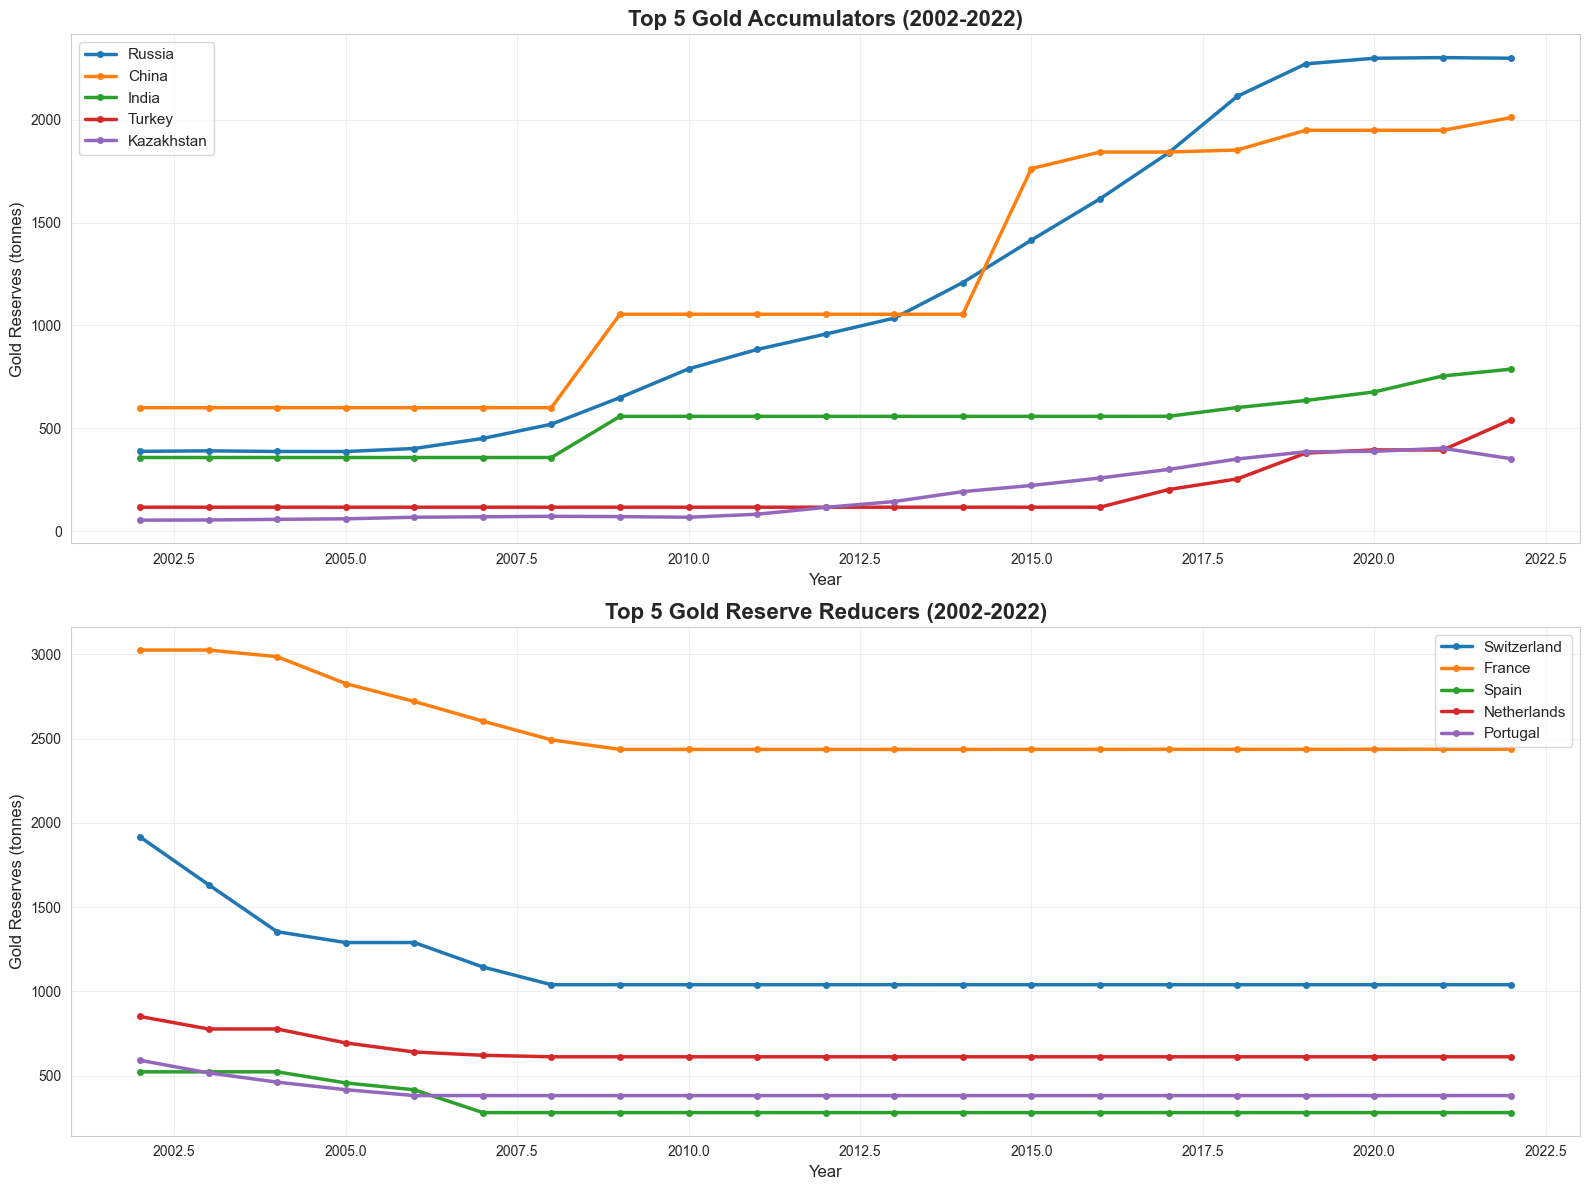

Visualization complete: Time series trends for top accumulators and reducers


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# Prepare data for plotting
year_cols = [str(year) for year in range(2002, 2023)]
years = list(range(2002, 2023))

# Select top 5 accumulators and top 5 reducers for visualization
top_accumulators = ['Russia', 'China', 'India', 'Turkey', 'Kazakhstan']
top_reducers = ['Switzerland', 'France', 'Spain', 'Netherlands', 'Portugal']

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Top Accumulators
ax1 = axes[0]
for country in top_accumulators:
    country_data = df[df['country'] == country]
    if not country_data.empty:
        values = country_data[year_cols].values.flatten()
        ax1.plot(years, values, marker='o', linewidth=2.5, markersize=4, label=country)

ax1.set_title('Top 5 Gold Accumulators (2002-2022)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Gold Reserves (tonnes)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Top Reducers
ax2 = axes[1]
for country in top_reducers:
    country_data = df[df['country'] == country]
    if not country_data.empty:
        values = country_data[year_cols].values.flatten()
        ax2.plot(years, values, marker='o', linewidth=2.5, markersize=4, label=country)

ax2.set_title('Top 5 Gold Reserve Reducers (2002-2022)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Gold Reserves (tonnes)', fontsize=12)
ax2.legend(loc='upper right', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization complete: Time series trends for top accumulators and reducers")

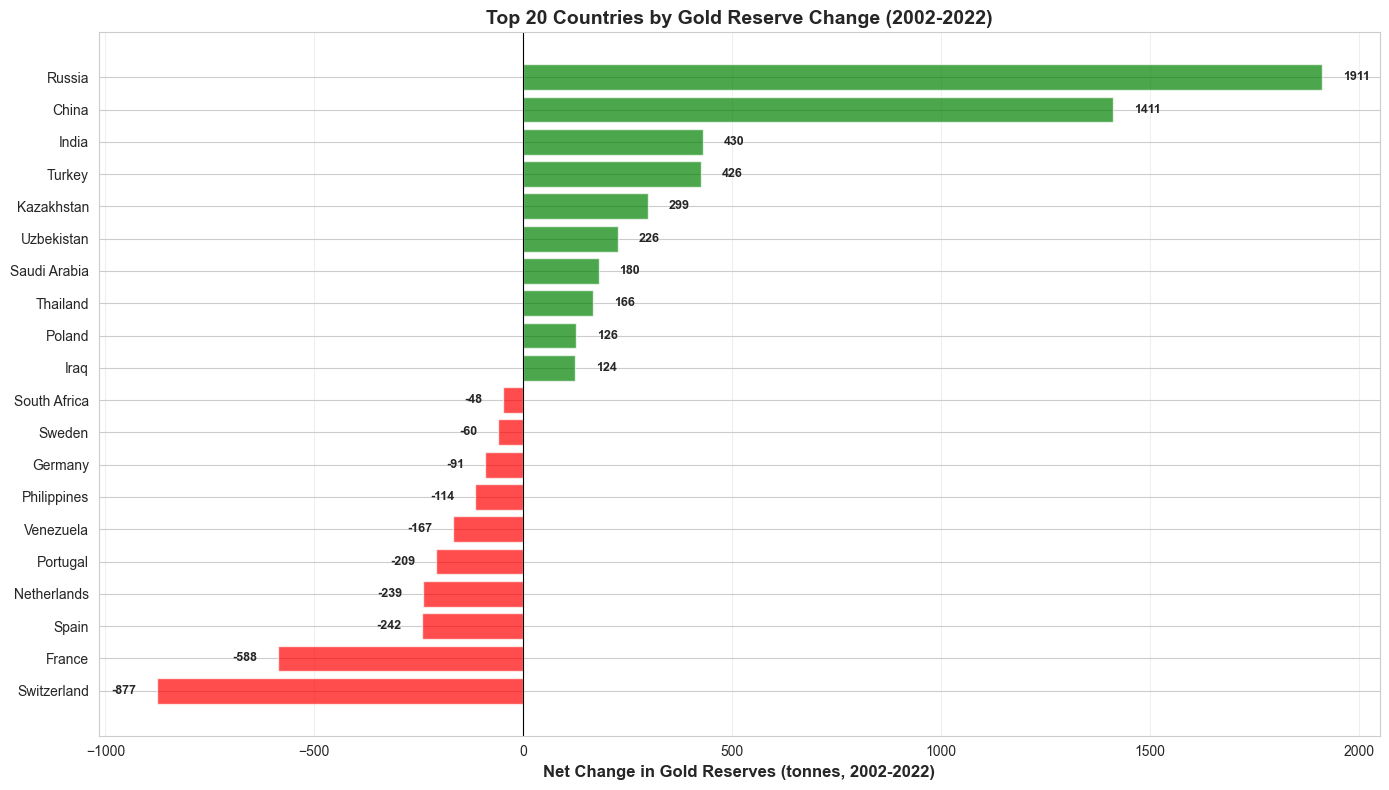


Summary Statistics:
Total global gold accumulation: 3409.77 tonnes
Number of countries accumulating: 52
Number of countries reducing: 31


In [8]:
# Create a bar chart showing net change for all significant movers
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 10 accumulators and bottom 10 reducers
top_movers = df_sorted.head(10).copy()
bottom_movers = df_sorted.tail(10).copy()
significant_movers = pd.concat([top_movers, bottom_movers])

# Sort by total change for visualization
significant_movers = significant_movers.sort_values('total_change')

# Create horizontal bar chart
colors = ['red' if x < 0 else 'green' for x in significant_movers['total_change']]
bars = ax.barh(significant_movers['country'], significant_movers['total_change'], color=colors, alpha=0.7)

ax.set_xlabel('Net Change in Gold Reserves (tonnes, 2002-2022)', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Countries by Gold Reserve Change (2002-2022)', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, significant_movers['total_change'])):
    label_x = value + (50 if value > 0 else -50)
    ax.text(label_x, bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
            va='center', ha='left' if value > 0 else 'right', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print(f"Total global gold accumulation: {df_sorted['total_change'].sum():.2f} tonnes")
print(f"Number of countries accumulating: {(df_sorted['total_change'] > 0).sum()}")
print(f"Number of countries reducing: {(df_sorted['total_change'] < 0).sum()}")

## 📊 Analysis Summary: Global Gold Reserve Trends (2002-2022)

### **Direct Answer to Your Questions:**

**Fastest Accumulator:** **RUSSIA** 🥇
- Added **1,911 tonnes** over 20 years
- Average rate: **95.5 tonnes per year**
- Percentage increase: **493%** (from 388 to 2,299 tonnes)

**Slowest Accumulator / Biggest Reducer:** **SWITZERLAND** 
- Reduced **877 tonnes** over 20 years  
- Average rate: **-43.8 tonnes per year**
- Percentage decrease: **-46%** (from 1,917 to 1,040 tonnes)

---

### **Key Insights:**

1. **Global Shift in Gold Holdings:** There's a clear East-to-West transfer of gold reserves. Emerging economies (Russia, China, India, Turkey, Kazakhstan) are aggressively building reserves, while Western European nations (Switzerland, France, Spain, Netherlands) are divesting.

2. **Net Global Accumulation:** Despite significant European reductions, global central bank gold reserves increased by **3,410 tonnes** from 2002-2022, as 52 countries accumulated while only 31 reduced holdings.

3. **Strategic Timing:** Russia's acceleration coincided with geopolitical tensions and diversification away from dollar-denominated assets. China's steady accumulation supports currency internationalization efforts.

4. **European Diversification:** Western European nations appear to be rebalancing their reserve portfolios, likely moving toward more diverse assets or monetizing gold holdings.

### **Notable Patterns:**
- **Percentage winners:** Iraq (+2,120%), Kazakhstan (+562%), Russia (+493%)
- **Steady accumulators:** China and India show consistent, methodical growth
- **Steepest climbs:** Russia's accumulation accelerated dramatically after 2007-2008

## 📊 Analysis Summary: